130.98863470255534


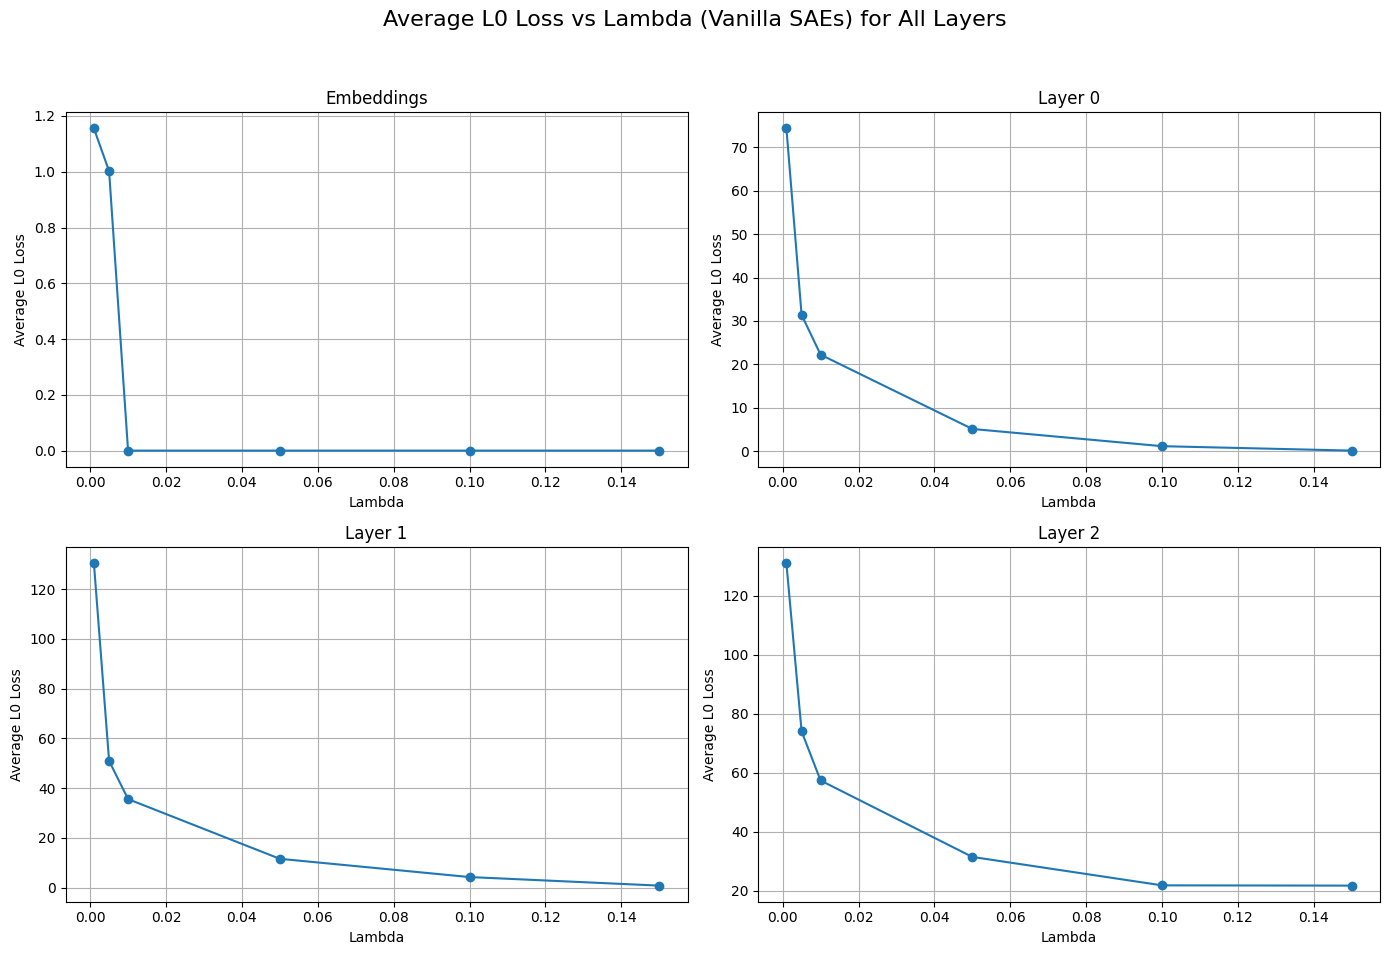

In [15]:
import json
import os
import matplotlib.pyplot as plt

# Path to the metric summary file
metric_summary_path = "outputs/saes/multipartite_002/metrics_summary.json"

# Load the metric summary data
with open(metric_summary_path, "r") as f:
    metric_data = json.load(f)

# Print a sample value for reference
print(metric_data['layer_2']['sequence']['vanilla']['lambda_0.001']['avg_last_quarter']['l0'])

# Function to extract and plot avg_last_quarter['l0'] vs lambda for a given layer
def plot_l0_vs_lambda_for_layer(metric_data, layer_key, ax=None):
    try:
        vanilla_runs = metric_data[layer_key]['sequence']['vanilla']
    except KeyError:
        print(f"Layer {layer_key} not found in metric data.")
        return

    lambda_values = []
    avg_l0_losses = []

    for lambda_key in vanilla_runs:
        if lambda_key.startswith("lambda_"):
            # Extract the numeric lambda value from the key
            lambda_str = lambda_key.split("_", 1)[1]
            try:
                lambda_val = float(lambda_str)
            except ValueError:
                continue  # skip if not a float
            # Get the average L0 loss for this lambda
            avg_l0 = vanilla_runs[lambda_key]['avg_last_quarter']['l0']
            lambda_values.append(lambda_val)
            avg_l0_losses.append(avg_l0)

    if not lambda_values:
        print(f"No lambda values found for {layer_key}.")
        return

    # Sort by lambda for a clean plot
    sorted_indices = sorted(range(len(lambda_values)), key=lambda i: lambda_values[i])
    lambda_values_sorted = [lambda_values[i] for i in sorted_indices]
    avg_l0_losses_sorted = [avg_l0_losses[i] for i in sorted_indices]

    if ax is None:
        plt.figure(figsize=(7, 5))
        plt.plot(lambda_values_sorted, avg_l0_losses_sorted, marker="o")
        plt.xlabel("Lambda")
        plt.ylabel("Average L0 Loss")
        plt.title(f"Average L0 Loss vs Lambda ({layer_key.replace('_', ' ').title()} Vanilla SAEs)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        ax.plot(lambda_values_sorted, avg_l0_losses_sorted, marker="o")
        ax.set_xlabel("Lambda")
        ax.set_ylabel("Average L0 Loss")
        ax.set_title(f"{layer_key.replace('_', ' ').title()}")
        ax.grid(True)

# List of layers to plot
layers_to_plot = ["embeddings", "layer_0", "layer_1", "layer_2"]

# Create subplots for all layers
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, layer_key in enumerate(layers_to_plot):
    plot_l0_vs_lambda_for_layer(metric_data, layer_key, ax=axs[i])

fig.suptitle("Average L0 Loss vs Lambda (Vanilla SAEs) for All Layers", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
